<a href="https://colab.research.google.com/github/sujiDuddaiyan/deep-learning-/blob/main/DL_ASS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [16]:
data = pd.read_csv("/content/RF_AI_1901-2021.csv")
data

,YEAR,JUN,JUL,AUG,SEP,JUN-SEP
0,1901,112.3,241.5,268.9,126.1,748.8
1,1902,109.0,283.2,202.1,201.0,795.2
2,1903,117.0,292.0,272.0,200.1,881.1
3,1904,164.4,261.4,204.1,130.6,760.4
4,1905,92.3,251.7,201.3,177.4,722.7
...,...,...,...,...,...,...
116,2017,172.7,290.3,229.5,153.2,845.7
117,2018,156.3,274.2,241.0,132.5,804.0
118,2019,113.6,297.0,299.9,260.2,970.8
119,2020,195.8,257.1,328.2,178.2,959.3


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   YEAR     121 non-null    int64  
 1   JUN      121 non-null    float64
 2   JUL      121 non-null    float64
 3   AUG      121 non-null    float64
 4   SEP      121 non-null    float64
 5   JUN-SEP  121 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 5.8 KB


In [18]:
data.isnull().sum()

,0
YEAR,0
JUN,0
JUL,0
AUG,0
SEP,0
JUN-SEP,0


In [19]:
data.describe()

,YEAR,JUN,JUL,AUG,SEP,JUN-SEP
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,1961.000000,167.055372,289.798347,257.752066,172.855372,887.461157
std,35.073732,35.226108,39.891831,35.611199,36.958019,87.446324
min,1901.000000,87.500000,138.500000,191.200000,96.400000,674.400000
25%,1931.000000,142.800000,266.500000,233.300000,144.900000,822.900000
50%,1961.000000,166.300000,292.000000,259.100000,172.300000,897.100000
75%,1991.000000,190.200000,317.000000,286.400000,199.500000,955.400000
max,2021.000000,273.400000,376.500000,337.600000,282.300000,1099.800000


In [3]:
data = pd.read_csv('/content/RF_AI_1901-2021.csv')

# Assuming the dataset has columns: 'June', 'July', 'August', 'September', 'Total'
X = data[['JUN', 'JUL', 'AUG', 'SEP']].values
y = data['JUN-SEP'].values

#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a simple linear regression model using Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_dim=X_train.shape[1])
])

#Compile the model with Mean Squared Error loss and an optimizer
model.compile(optimizer='adam', loss='mse')

#Train the model
history = model.fit(X_train, y_train, epochs=100, verbose=0)

# Predict on training data
y_train_pred = model.predict(X_train)

#Calculate MSE for training data
mse_train = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error on training data:", mse_train)

#Predict on test data and calculate MSE to check for overfitting
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error on test data:", mse_test)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Mean Squared Error on training data: 464927.5964195639
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Mean Squared Error on test data: 453099.34780147613


Mean Squared Error (MSE): 0.004580265907643187
Mean Absolute Error (MAE): 0.04897569556743747
R-squared (R²): 0.9999994607629253


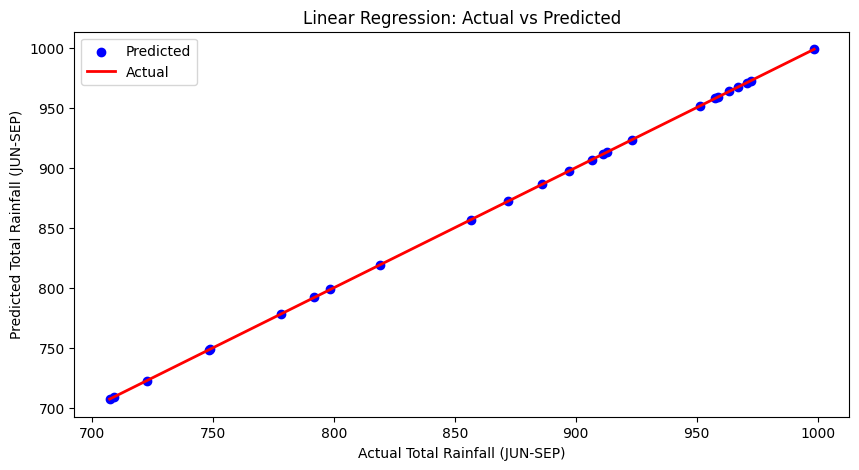

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Create and fit the model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Generate predictions
y_pred = linear_reg.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate R-squared (R²) score
r2 = r2_score(y_test, y_pred)
print("R-squared (R²):", r2)

# Plot Actual vs Predicted for Linear Regression
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Actual')
plt.xlabel('Actual Total Rainfall (JUN-SEP)')
plt.ylabel('Predicted Total Rainfall (JUN-SEP)')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()